# Hands on for Clustering: K-Means

In [24]:
import numpy as np
import matplotlib.pyplot as plt

## K-Means

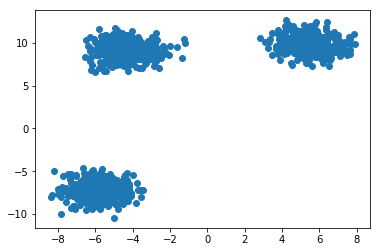

In [31]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=31)
plt.scatter(X[:, 0], X[:, 1]);

Centrals: [[-4.28632471  9.12458373]
 [-5.87127245 -7.26499289]
 [ 5.47211483  9.88072541]]


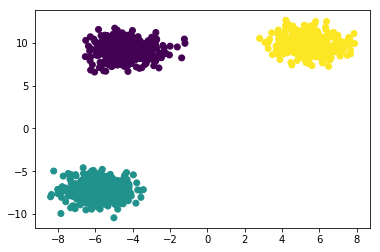

In [32]:
from sklearn.cluster import KMeans
km = KMeans(3)  # 3 clusters
km.fit(X)
y_kmeans = km.predict(X)
print('Centrals:',km.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans);

Choose optimal K using Elbow Method:

Calculate the *Within-Cluster-Sum of Squared Errors (WSS)* for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

In [17]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

WSS [89655.1340498759, 17951.94274342997, 1977.513330818765, 1737.0320770725964, 1503.3485979617315, 1287.6216813355143, 1119.6185492523866, 984.3314539890093, 870.0145943508048, 796.1271543907042]


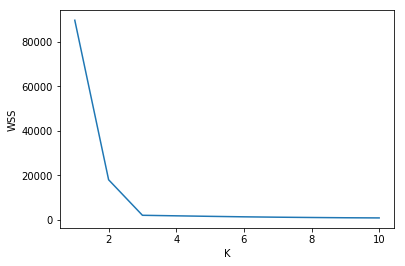

In [33]:
WSS = calculate_WSS(X,10)
print('WSS',WSS)
plt.plot(range(1,11),WSS)
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()